In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6746ba6b3c16e77145d6ee5dc11b8c1a


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | balimo
City not found. Skipping...
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | analipsis
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | luganville
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | ginir
Processing Record 18 of Set 1 | ruteng
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bilma
Processing Record 21 of Set 1 | mocambique
City not found. Skipping...
Processing Record 22 of Set 1 | sorvag
City not found. Skippi

Processing Record 38 of Set 4 | humaita
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | chikwawa
Processing Record 41 of Set 4 | inta
Processing Record 42 of Set 4 | hendek
Processing Record 43 of Set 4 | lata
Processing Record 44 of Set 4 | svetlaya
Processing Record 45 of Set 4 | sayyan
Processing Record 46 of Set 4 | kharan
Processing Record 47 of Set 4 | urumqi
Processing Record 48 of Set 4 | aransas pass
Processing Record 49 of Set 4 | goderich
Processing Record 50 of Set 4 | trairi
Processing Record 1 of Set 5 | grindavik
Processing Record 2 of Set 5 | cockburn town
Processing Record 3 of Set 5 | sao gabriel da cachoeira
Processing Record 4 of Set 5 | owando
Processing Record 5 of Set 5 | tucuman
Processing Record 6 of Set 5 | tadine
Processing Record 7 of Set 5 | nikolskoye
Processing Record 8 of Set 5 | japura
Processing Record 9 of Set 5 | tiksi
Processing Record 10 of Set 5 | wladyslawowo
Processing Record 11 of Set 5 | dubbo
Processing Record 12 of Se

Processing Record 27 of Set 8 | hauterive
Processing Record 28 of Set 8 | wasilla
Processing Record 29 of Set 8 | ponta delgada
Processing Record 30 of Set 8 | nieuw amsterdam
Processing Record 31 of Set 8 | kibala
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | grand gaube
Processing Record 34 of Set 8 | ussuriysk
Processing Record 35 of Set 8 | souillac
Processing Record 36 of Set 8 | svarstad
Processing Record 37 of Set 8 | nalagarh
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | egvekinot
Processing Record 40 of Set 8 | ust-tsilma
Processing Record 41 of Set 8 | pemangkat
Processing Record 42 of Set 8 | benghazi
Processing Record 43 of Set 8 | la ronge
Processing Record 44 of Set 8 | iskateley
Processing Record 45 of Set 8 | auchi
Processing Record 46 of Set 8 | turangi
Processing Record 47 of Set 8 | guane
Processing Record 48 of Set 8 | lagoa
Processing Record 49 of Set 8 | phan thiet
Processing Record 50 of Set 8 | anloga
Processing R

Processing Record 20 of Set 12 | imeni poliny osipenko
Processing Record 21 of Set 12 | marv dasht
City not found. Skipping...
Processing Record 22 of Set 12 | miandrivazo
Processing Record 23 of Set 12 | bull savanna
Processing Record 24 of Set 12 | yulara
Processing Record 25 of Set 12 | muisne
Processing Record 26 of Set 12 | alvinopolis
Processing Record 27 of Set 12 | caala
Processing Record 28 of Set 12 | nelson bay
Processing Record 29 of Set 12 | guadix
Processing Record 30 of Set 12 | vanimo
Processing Record 31 of Set 12 | mehamn
Processing Record 32 of Set 12 | fond du lac
Processing Record 33 of Set 12 | college
Processing Record 34 of Set 12 | champerico
Processing Record 35 of Set 12 | karratha
Processing Record 36 of Set 12 | cap malheureux
Processing Record 37 of Set 12 | kalmunai
Processing Record 38 of Set 12 | kholodnyy
Processing Record 39 of Set 12 | tagusao
Processing Record 40 of Set 12 | huron
Processing Record 41 of Set 12 | hogyesz
Processing Record 42 of Set 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.80,-68.30,37.40,91,75,14.99,AR,2020-12-02 03:30:56
1,Atuona,-9.80,-139.03,78.26,78,1,14.94,PF,2020-12-02 03:34:01
2,San Patricio,28.02,-97.52,61.00,87,20,8.05,US,2020-12-02 03:40:28
3,Bluff,-46.60,168.33,55.17,75,99,29.97,NZ,2020-12-02 03:33:43
4,Saint-Pierre,-21.34,55.48,80.60,69,90,2.80,RE,2020-12-02 03:35:55
5,Barrow,71.29,-156.79,6.80,77,90,18.34,US,2020-12-02 03:43:05
6,Klaksvik,62.23,-6.59,42.80,81,40,14.99,FO,2020-12-02 03:43:06
7,Analipsis,35.32,25.57,59.00,87,75,6.87,GR,2020-12-02 03:43:06
8,Rikitea,-23.12,-134.97,75.78,66,79,5.03,PF,2020-12-02 03:40:29
9,Albany,42.60,-73.97,39.99,48,22,7.14,US,2020-12-02 03:43:06


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


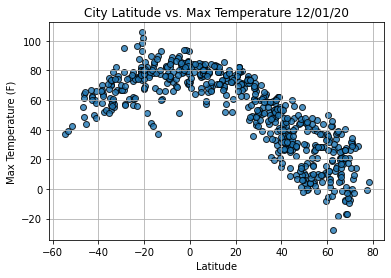

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

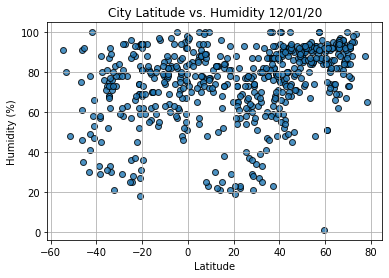

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

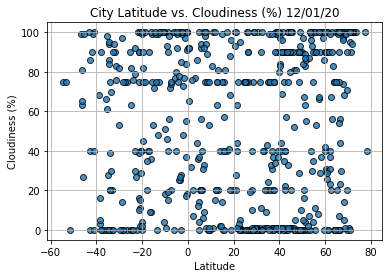

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


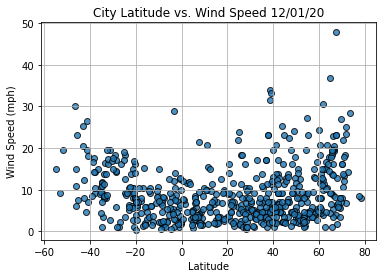

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()